In [1]:
#Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


# Formatting
pd.options.display.float_format = '{:20.2f}'.format

pd.set_option('display.max_columns', 999)

## Data Exploration

In [2]:
df = pd.read_excel("online_retail_II.xlsx", sheet_name=0)

In [3]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [6]:
df.describe(include="O")

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [7]:
#Looking at the first 10 missing values in customer ID
df[df["Customer ID"].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [8]:
#Looking at purchases with -ive quantity
df[df["Quantity"] < 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


In [9]:
#Looking at the invoice column 
df["Invoice"] = df["Invoice"].astype("str")
df[df["Invoice"].str.match("^\\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [10]:
df["Invoice"].str.replace("[0-9]", "", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [11]:
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [12]:
#Set StockCode to string type
df["StockCode"] = df["StockCode"].astype("str")
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

#### Look through all of the unique stock codes to see if they are valid

In [13]:
df[df["StockCode"].str.contains("^DOT")].head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom


In [14]:
df[df["StockCode"].str.match("^D$") == True].head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.00,United Kingdom
736,C489535,D,Discount,-1,2009-12-01 12:11:00,19.00,15299.00,United Kingdom
24675,C491428,D,Discount,-1,2009-12-10 20:23:00,9.10,15494.00,United Kingdom
29414,C491845,D,Discount,-1,2009-12-14 14:54:00,1.59,NaN,United Kingdom
29958,C491962,D,Discount,-1,2009-12-14 16:38:00,0.59,13206.00,United Kingdom


In [15]:
df[df["StockCode"].str.contains("^DCGS0058")].head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2377,489597,DCGS0058,MISO PRETTY GUM,1,2009-12-01 14:28:00,0.83,NaN,United Kingdom
8372,490074,DCGS0058,MISO PRETTY GUM,1,2009-12-03 14:39:00,0.83,NaN,United Kingdom
17264,490745,DCGS0058,MISO PRETTY GUM,1,2009-12-07 18:02:00,0.83,NaN,United Kingdom
30671,491969,DCGS0058,MISO PRETTY GUM,1,2009-12-14 17:57:00,0.83,NaN,United Kingdom
31652,491970,DCGS0058,MISO PRETTY GUM,1,2009-12-14 18:03:00,0.83,NaN,United Kingdom


In [16]:
df[df["StockCode"].str.contains("^DCGS0068")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2378,489597,DCGS0068,DOGS NIGHT COLLAR,1,2009-12-01 14:28:00,8.65,NaN,United Kingdom
62734,494918,DCGS0068,DOGS NIGHT COLLAR,1,2010-01-19 17:49:00,8.47,NaN,United Kingdom


In [17]:
df[df["StockCode"].str.match("^M$") == True].head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2697,489609,M,Manual,1,2009-12-01 14:50:00,4.00,NaN,United Kingdom
3053,C489651,M,Manual,-1,2009-12-01 16:48:00,5.10,17804.00,United Kingdom
5897,C489859,M,Manual,-1,2009-12-02 14:45:00,69.57,NaN,United Kingdom
9259,C490126,M,Manual,-1,2009-12-03 18:12:00,5.95,15884.00,United Kingdom
9307,C490129,M,Manual,-1,2009-12-03 18:26:00,1998.49,15482.00,United Kingdom


In [18]:
df[df["StockCode"].str.contains("^DCGS0004")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
8371,490074,DCGS0004,HAYNES CAMPER SHOULDER BAG,1,2009-12-03 14:39:00,17.35,NaN,United Kingdom
98951,498699,DCGS0004,NaN,-2,2010-02-22 12:32:00,0.00,NaN,United Kingdom
164723,504935,DCGS0004,HAYNES CAMPER SHOULDER BAG,1,2010-04-19 11:19:00,16.98,NaN,United Kingdom
401083,527789,DCGS0004,HAYNES CAMPER SHOULDER BAG,1,2010-10-19 11:10:00,16.98,NaN,United Kingdom


In [19]:
df[df["StockCode"].str.contains("^DCGS0076")].head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
8373,490074,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2009-12-03 14:39:00,16.48,NaN,United Kingdom
16426,490741,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2009-12-07 17:56:00,16.48,NaN,United Kingdom
17265,490745,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2009-12-07 18:02:00,16.48,NaN,United Kingdom
20324,491043,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2009-12-09 09:51:00,16.48,NaN,United Kingdom
30673,491969,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2009-12-14 17:57:00,16.48,NaN,United Kingdom


In [20]:
df[df["StockCode"].str.match("^C2$") == True].head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
9292,490127,C2,CARRIAGE,1,2009-12-03 18:13:00,50.00,14156.00,EIRE
14481,490541,C2,CARRIAGE,1,2009-12-07 09:25:00,50.00,NaN,EIRE
14502,490542,C2,CARRIAGE,1,2009-12-07 09:42:00,50.00,14911.00,EIRE
19541,490998,C2,CARRIAGE,1,2009-12-08 17:24:00,50.00,16253.00,United Kingdom
22803,491160,C2,CARRIAGE,1,2009-12-10 10:29:00,50.00,14911.00,EIRE


In [21]:
df[df["StockCode"].str.contains("^BANK CHARGES")].head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
18410,C490943,BANK CHARGES,Bank Charges,-1,2009-12-08 14:08:00,15.00,16703.00,United Kingdom
18466,490948,BANK CHARGES,Bank Charges,1,2009-12-08 14:29:00,15.00,16805.00,United Kingdom
33435,C492206,BANK CHARGES,Bank Charges,-1,2009-12-15 16:32:00,848.43,NaN,United Kingdom
55948,C494438,BANK CHARGES,Bank Charges,-1,2010-01-14 12:15:00,767.99,NaN,United Kingdom
94431,498269,BANK CHARGES,Bank Charges,1,2010-02-17 15:03:00,15.00,16928.00,United Kingdom


In [22]:
df[df["StockCode"].str.contains("^DCGS0003")].head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
20249,491041,DCGS0003,BOXED GLASS ASHTRAY,1,2009-12-09 09:42:00,2.57,NaN,United Kingdom
232222,511858,DCGS0003,BOXED GLASS ASHTRAY,1,2010-06-11 10:05:00,2.51,NaN,United Kingdom
238355,512437,DCGS0003,BOXED GLASS ASHTRAY,1,2010-06-15 16:17:00,2.51,NaN,United Kingdom
244829,513099,DCGS0003,BOXED GLASS ASHTRAY,1,2010-06-21 15:13:00,2.51,NaN,United Kingdom
267418,515287,DCGS0003,BOXED GLASS ASHTRAY,1,2010-07-09 14:58:00,2.51,NaN,United Kingdom


In [23]:
df[df["StockCode"].str.contains("^TEST001")].head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
27994,491725,TEST001,This is a test product.,10,2009-12-14 08:34:00,4.50,12346.00,United Kingdom
28251,491742,TEST001,This is a test product.,5,2009-12-14 11:00:00,4.50,12346.00,United Kingdom
28254,491744,TEST001,This is a test product.,5,2009-12-14 11:02:00,4.50,12346.00,United Kingdom
39398,492718,TEST001,This is a test product.,5,2009-12-18 10:47:00,4.50,12346.00,United Kingdom
45228,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.00,United Kingdom


In [24]:
df[df["StockCode"].str.contains("^gift_0001_80")].head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
30620,491968,gift_0001_80,NaN,2,2009-12-14 17:56:00,0.00,NaN,United Kingdom
31079,491969,gift_0001_80,Dotcomgiftshop Gift Voucher £80.00,1,2009-12-14 17:57:00,69.56,NaN,United Kingdom
56446,C494472,gift_0001_80,Dotcomgiftshop Gift Voucher £80.00,-1,2010-01-14 14:51:00,69.56,NaN,United Kingdom
298842,518488,gift_0001_80,NaN,10,2010-08-09 12:29:00,0.00,NaN,United Kingdom


In [25]:
df[df["StockCode"].str.contains("^DCGS0072")].head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
30672,491969,DCGS0072,CAT CAMOUFLAGUE COLLAR,1,2009-12-14 17:57:00,5.17,NaN,United Kingdom
34669,492303,DCGS0072,CAT CAMOUFLAGUE COLLAR,2,2009-12-16 11:57:00,5.17,NaN,United Kingdom
41261,492783,DCGS0072,CAT CAMOUFLAGUE COLLAR,1,2009-12-18 17:15:00,5.17,NaN,United Kingdom


In [26]:
df[df["StockCode"].str.contains("^gift_0001_20")].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
32048,491971,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,2,2009-12-14 18:37:00,17.39,NaN,United Kingdom
40905,492782,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2009-12-18 17:06:00,17.39,NaN,United Kingdom
45213,493404,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2009-12-23 15:30:00,17.39,NaN,United Kingdom
75097,496247,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2010-01-29 16:11:00,17.02,NaN,United Kingdom
96283,498443,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2010-02-19 09:49:00,17.02,NaN,United Kingdom
153282,503940,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2010-04-08 14:47:00,17.02,NaN,United Kingdom
181337,506577,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2010-04-30 13:45:00,17.02,NaN,United Kingdom
195555,508077,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2010-05-12 16:29:00,17.02,NaN,United Kingdom
254427,513946,gift_0001_20,NaN,5,2010-06-29 13:35:00,0.00,NaN,United Kingdom
265191,515013,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2010-07-07 16:29:00,17.02,NaN,United Kingdom


In [27]:
df[df["StockCode"].str.contains("^DCGS0044")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
33819,492226,DCGS0044,HANDZ-OFF CAR FRESHENER,1,2009-12-15 18:33:00,2.57,NaN,United Kingdom


In [28]:
df[df["StockCode"].str.contains("^TEST002")].head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
39411,492722,TEST002,This is a test product.,1,2009-12-18 10:55:00,1.00,12346.00,United Kingdom
44614,493294,TEST002,NaN,1,2009-12-22 15:15:00,0.00,NaN,United Kingdom


In [29]:
df[df["StockCode"].str.contains("^gift_0001_10")].head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
40904,492782,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2009-12-18 17:06:00,8.69,NaN,United Kingdom
125922,501441,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2010-03-16 13:44:00,8.51,NaN,United Kingdom
136604,502486,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2010-03-24 17:43:00,8.51,NaN,United Kingdom
218754,510637,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2010-06-02 11:54:00,8.51,NaN,United Kingdom
298848,518496,gift_0001_10,NaN,10,2010-08-09 12:31:00,0.00,NaN,United Kingdom


In [30]:
df[df["StockCode"].str.contains("^gift_0001_50")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
41263,492783,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,1,2009-12-18 17:15:00,43.48,NaN,United Kingdom
75136,496249,gift_0001_50,NaN,3,2010-01-29 16:17:00,0.00,NaN,United Kingdom
298841,518491,gift_0001_50,NaN,10,2010-08-09 12:29:00,0.00,NaN,United Kingdom
376731,525755,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,1,2010-10-07 10:23:00,42.55,NaN,United Kingdom


In [31]:
df[df["StockCode"].str.contains("^DCGS0044")].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
33819,492226,DCGS0044,HANDZ-OFF CAR FRESHENER,1,2009-12-15 18:33:00,2.57,NaN,United Kingdom


In [32]:
df[df["StockCode"].str.contains("^gift_0001_30")].head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
45212,493404,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2009-12-23 15:30:00,26.08,NaN,United Kingdom
54564,494380,gift_0001_30,NaN,5,2010-01-13 17:39:00,0.00,NaN,United Kingdom
54636,494381,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2010-01-13 17:44:00,25.53,NaN,United Kingdom
66801,495343,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2010-01-22 18:05:00,25.53,NaN,United Kingdom
142163,502872,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2010-03-29 09:59:00,25.53,NaN,United Kingdom


In [33]:
df[df["StockCode"].str.contains("^PADS")].head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.00,16705.00,United Kingdom
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.00,13583.00,United Kingdom
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.00,17350.00,United Kingdom
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.00,13408.00,United Kingdom
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47:00,0.00,13408.00,United Kingdom


In [34]:
df[df["StockCode"].str.contains("^ADJUST")].head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
70975,495732,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:20:00,96.46,NaN,EIRE
70976,495733,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:21:00,68.34,14911.00,EIRE
70977,495735,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:22:00,201.56,12745.00,EIRE
70978,495734,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:22:00,205.82,14911.00,EIRE
70979,C495737,ADJUST,Adjustment by john on 26/01/2010 16,-1,2010-01-26 16:23:00,10.50,16154.00,United Kingdom


In [35]:
df[df["StockCode"].str.contains("^gift_0001_40")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
75137,496248,gift_0001_40,NaN,3,2010-01-29 16:17:00,0.00,NaN,United Kingdom
298847,518492,gift_0001_40,NaN,10,2010-08-09 12:30:00,0.00,NaN,United Kingdom
299652,518579,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,1,2010-08-10 12:08:00,31.35,NaN,United Kingdom
407443,528382,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,1,2010-10-21 18:01:00,34.04,NaN,United Kingdom


In [36]:
df[df["StockCode"].str.contains("^gift_0001_60")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
75138,496250,gift_0001_60,NaN,3,2010-01-29 16:17:00,0.00,NaN,United Kingdom
298843,518490,gift_0001_60,NaN,10,2010-08-09 12:29:00,0.00,NaN,United Kingdom


In [37]:
df[df["StockCode"].str.contains("^gift_0001_70")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
75139,496251,gift_0001_70,NaN,2,2010-01-29 16:17:00,0.00,NaN,United Kingdom
235291,512168,gift_0001_70,Dotcomgiftshop Gift Voucher £70.00,1,2010-06-14 11:24:00,59.57,NaN,United Kingdom
298840,518489,gift_0001_70,NaN,10,2010-08-09 12:29:00,0.00,NaN,United Kingdom


In [38]:
df[df["StockCode"].str.contains("^gift_0001_90")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
75141,496252,gift_0001_90,NaN,2,2010-01-29 16:18:00,0.00,NaN,United Kingdom
298839,518487,gift_0001_90,NaN,10,2010-08-09 12:28:00,0.00,NaN,United Kingdom


In [39]:
df[df["StockCode"].str.contains("^DCGSSGIRL")].head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
80231,496722,DCGSSGIRL,NaN,-1,2010-02-03 14:04:00,0.00,NaN,United Kingdom
241372,512738,DCGSSGIRL,update,100,2010-06-17 14:11:00,0.00,NaN,United Kingdom
244831,513099,DCGSSGIRL,GIRLS PARTY BAG,3,2010-06-21 15:13:00,3.36,NaN,United Kingdom
246184,513200,DCGSSGIRL,GIRLS PARTY BAG,6,2010-06-22 16:28:00,3.36,NaN,United Kingdom
249938,513574,DCGSSGIRL,GIRLS PARTY BAG,1,2010-06-25 15:13:00,3.36,NaN,United Kingdom


In [40]:
df[df["StockCode"].str.contains("^DCGS0006")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
80337,496740,DCGS0006,NaN,-1,2010-02-03 14:28:00,0.00,NaN,United Kingdom


In [41]:
df[df["StockCode"].str.contains("^DCGS0016")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
80338,496741,DCGS0016,NaN,-1,2010-02-03 14:29:00,0.00,NaN,United Kingdom


In [42]:
df[df["StockCode"].str.contains("^DCGS0027")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
80339,496742,DCGS0027,NaN,-1,2010-02-03 14:29:00,0.00,NaN,United Kingdom


In [43]:
df[df["StockCode"].str.contains("^DCGS0036")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
80342,496744,DCGS0036,NaN,-1,2010-02-03 14:35:00,0.00,NaN,United Kingdom


In [44]:
df[df["StockCode"].str.contains("^DCGS0039")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
80361,496746,DCGS0039,NaN,-1,2010-02-03 14:36:00,0.00,NaN,United Kingdom


In [45]:
df[df["StockCode"].str.contains("^DCGS0060")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
80953,496814,DCGS0060,NaN,-3,2010-02-04 09:46:00,0.00,NaN,United Kingdom


In [46]:
df[df["StockCode"].str.contains("^DCGS0056")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
81143,496855,DCGS0056,NaN,-4,2010-02-04 11:46:00,0.00,NaN,United Kingdom


In [47]:
df[df["StockCode"].str.contains("^DCGS0059")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
82846,496988,DCGS0059,NaN,-8,2010-02-05 11:21:00,0.00,NaN,United Kingdom


In [48]:
df[df["StockCode"].str.contains("^GIFT")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
83304,497107,GIFT,NaN,-9,2010-02-05 15:18:00,0.00,NaN,United Kingdom


In [49]:
df[df["StockCode"].str.contains("^DCGSLBOY")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89000,497811,DCGSLBOY,NaN,-16,2010-02-12 14:45:00,0.00,NaN,United Kingdom


In [50]:
df[df["StockCode"].str.match("^m$") == True].head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
96608,498492,m,Manual,1,2010-02-19 10:56:00,2.55,NaN,United Kingdom
96609,498492,m,Manual,1,2010-02-19 10:56:00,3.40,NaN,United Kingdom
157226,504396,m,Manual,1,2010-04-13 11:45:00,4.00,NaN,United Kingdom
228780,511509,m,Manual,1,2010-06-08 15:26:00,2.55,NaN,United Kingdom


In [51]:
df[df["StockCode"].str.contains("^DCGS0053")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
98950,498698,DCGS0053,NaN,-2,2010-02-22 12:29:00,0.00,NaN,United Kingdom


In [52]:
df[df["StockCode"].str.contains("^DCGS0062")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
98952,498700,DCGS0062,NaN,-1,2010-02-22 12:34:00,0.00,NaN,United Kingdom
414064,528952,DCGS0062,ROAD-RAGE CAR FRESHENER,1,2010-10-25 16:57:00,2.51,NaN,United Kingdom


In [53]:
df[df["StockCode"].str.contains("^DCGS0037")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
98953,498701,DCGS0037,NaN,-1,2010-02-22 12:35:00,0.00,NaN,United Kingdom
236545,512289,DCGS0037,KEY-RING CORKSCREW,1,2010-06-14 14:49:00,12.72,NaN,United Kingdom


In [54]:
df[df["StockCode"].str.contains("^DCGSSBOY")].head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
101692,499040,DCGSSBOY,NaN,-90,2010-02-24 13:16:00,0.00,NaN,United Kingdom
241371,512737,DCGSSBOY,update,100,2010-06-17 14:10:00,0.00,NaN,United Kingdom
244830,513099,DCGSSBOY,BOYS PARTY BAG,5,2010-06-21 15:13:00,3.36,NaN,United Kingdom
246183,513200,DCGSSBOY,BOYS PARTY BAG,7,2010-06-22 16:28:00,3.36,NaN,United Kingdom
249937,513574,DCGSSBOY,BOYS PARTY BAG,3,2010-06-25 15:13:00,3.36,NaN,United Kingdom


In [55]:
df[df["StockCode"].str.contains("^DCGSLGIRL")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
101693,499042,DCGSLGIRL,NaN,-57,2010-02-24 13:31:00,0.00,NaN,United Kingdom


In [56]:
df[df["StockCode"].str.match("^S$") == True].head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
114061,C500305,S,SAMPLES,-1,2010-03-07 10:59:00,73.80,NaN,United Kingdom
114083,C500309,S,SAMPLES,-1,2010-03-07 11:09:00,32.03,NaN,United Kingdom
133558,C502083,S,SAMPLES,-1,2010-03-22 15:50:00,170.37,NaN,United Kingdom
133582,C502088,S,SAMPLES,-1,2010-03-22 16:03:00,259.59,NaN,United Kingdom
136253,C502438,S,SAMPLES,-1,2010-03-24 13:11:00,605.18,NaN,United Kingdom


In [57]:
df[df["StockCode"].str.contains("^DCGS0069")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
123592,501161,DCGS0069,OOH LA LA DOGS COLLAR,1,2010-03-15 09:28:00,16.13,NaN,United Kingdom
148841,503549,DCGS0069,OOH LA LA DOGS COLLAR,1,2010-04-01 15:04:00,16.13,NaN,United Kingdom
151515,503823,DCGS0069,OOH LA LA DOGS COLLAR,1,2010-04-07 14:59:00,16.13,NaN,United Kingdom
405236,528145,DCGS0069,OOH LA LA DOGS COLLAR,1,2010-10-20 15:56:00,16.13,NaN,United Kingdom


In [58]:
df[df["StockCode"].str.contains("^DCGS0070")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
148842,503549,DCGS0070,CAMOUFLAGE DOG COLLAR,1,2010-04-01 15:04:00,12.72,NaN,United Kingdom


In [59]:
df[df["StockCode"].str.contains("^DCGS0075")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
148843,503549,DCGS0075,CAMOUFLAGUE DOG LEAD,1,2010-04-01 15:04:00,12.72,NaN,United Kingdom


In [60]:
df[df["StockCode"].str.match("^B$") == True].head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [61]:
df[df["StockCode"].str.contains("^DCGS0041")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
222345,511021,DCGS0041,HAYNES MINI-COOPER PLAYING CARDS,1,2010-06-04 16:13:00,5.06,NaN,United Kingdom


In [62]:
df[df["StockCode"].str.contains("^ADJUST2")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
249672,513564,ADJUST2,Adjustment by Peter on Jun 25 2010,1,2010-06-25 14:15:00,300.13,17050.00,United Kingdom
249673,513566,ADJUST2,Adjustment by Peter on Jun 25 2010,1,2010-06-25 14:15:00,358.47,17364.00,United Kingdom
249674,513565,ADJUST2,Adjustment by Peter on Jun 25 2010,1,2010-06-25 14:15:00,72.45,16422.00,United Kingdom


In [63]:
df[df["StockCode"].str.contains("^47503J")].head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2981,489642,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,1,2009-12-01 16:19:00,7.95,NaN,United Kingdom
9784,490149,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,1,2009-12-04 09:43:00,16.48,NaN,United Kingdom
15894,490711,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,1,2009-12-07 15:26:00,7.95,17841.00,United Kingdom
20061,491041,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,1,2009-12-09 09:42:00,16.48,NaN,United Kingdom
24867,C491446,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,-7,2009-12-11 10:47:00,7.95,14191.00,United Kingdom


In [64]:
df[df["StockCode"].str.contains("^C3")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
302041,518785,C3,NaN,-4999,2010-08-11 16:55:00,0.00,NaN,United Kingdom


In [65]:
df[df["StockCode"].str.contains("^SP1002")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
377066,525772,SP1002,KID'S CHALKBOARD/EASEL,1,2010-10-07 11:12:00,2.95,12748.00,United Kingdom
377387,525837,SP1002,KID'S CHALKBOARD/EASEL,4,2010-10-07 12:23:00,2.95,17841.00,United Kingdom
426694,530135,SP1002,NaN,-27,2010-11-01 15:33:00,0.00,NaN,United Kingdom


In [66]:
df[df["StockCode"].str.contains("^AMAZONFEE")].head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
440688,C531400,AMAZONFEE,AMAZON FEE,-1,2010-11-08 10:08:00,6706.71,NaN,United Kingdom
440698,531411,AMAZONFEE,AMAZON FEE,1,2010-11-08 10:11:00,6706.71,NaN,United Kingdom
517452,C537600,AMAZONFEE,AMAZON FEE,-1,2010-12-07 12:41:00,1.00,NaN,United Kingdom
517953,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom
517955,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom


## Stock Codes

* Stock codes follow a specific format of 5 digits from [0-9], however some do have a letter from [a-z] after the digits. The cases listed below are special cases and we will determine if they should belong in the analysis.

| Variable      | Description           |  Action |
| ------------- |-----------------| :----------------- |
| `DCGS`     | Looks valid, however some quantities are negative and missing customer ID | Exclude from clustering |
| `D`     | Looks valid and it represents discount values  | Exclude from clustering |
| `DOT`     | Looks valid and represents the charges from postage | Exclude from clustering |
| `M or m`     | Looks valid represents manual transactions | Exclude from clustering |
| `C2`     | Carriage transaction | Exclude from clustering |
| `C3`     | Only one value | Exclude |
| `Bank Charges or B`     | Bank charges | Exclude from clustering |
| `S`     | Samples sent to customers | Exclude from clustering |
| `TESTXXX`     | Testing data | Exclude from clustering |
| `gift_XXX`     | Purchases from Gift Card, does not hold customer data | Exclude |
| `PADS`     | Stock Code for padding, unique case | Include |
| `SP1002`     | 3 transactions for a special item, however, 1 has no pricing | Exclude |
| `AMAZONFEE`     | Amazon shipping fee | Exclude |
| `ADJUSTX`     | Manual adjustments by Admin | Exclude |

## Data Cleaning

In [67]:
cleaned_df = df.copy()

In [68]:
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str")

mask = (
    cleaned_df["Invoice"].str.match("^\\d{6}$") == True
)

cleaned_df = cleaned_df[mask]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [69]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")

mask = (
    (cleaned_df["StockCode"].str.match("^\\d{5}$") == True)
    | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
    | (cleaned_df["StockCode"].str.match("^PADS$") == True)                              
)

cleaned_df = cleaned_df[mask]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [70]:
cleaned_df.dropna(subset=["Customer ID"], inplace=True)

C:\Users\ScottieDFloppyPC\AppData\Local\Temp\ipykernel_18744\1633333693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=["Customer ID"], inplace=True)


In [71]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.00,406337,406337.00,406337.00
mean,13.62,2010-07-01 10:11:06.543288320,2.99,15373.63
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14004.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.37


In [72]:
cleaned_df[cleaned_df["Price"] == 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.00,16126.00,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.00,15658.00,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.00,14108.00,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.00,14108.00,United Kingdom
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,2009-12-15 13:49:00,0.00,15070.00,United Kingdom
40101,492760,21143,ANTIQUE GLASS HEART DECORATION,12,2009-12-18 14:22:00,0.00,18071.00,United Kingdom
47126,493761,79320,FLAMINGO LIGHTS,24,2010-01-06 14:54:00,0.00,14258.00,United Kingdom
48342,493899,22355,"CHARLOTTE BAG , SUKI DESIGN",10,2010-01-08 10:43:00,0.00,12417.00,Belgium
57619,494607,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-15 12:43:00,0.00,16858.00,United Kingdom
111348,500073,21662,VINTAGE GLASS COFFEE CADDY,1,2010-03-04 11:44:00,0.00,13047.00,United Kingdom


In [73]:
len(cleaned_df[cleaned_df["Price"] == 0])


28

In [74]:
cleaned_df = cleaned_df[cleaned_df["Price"] > 0]

In [75]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406309.00,406309,406309.00,406309.00
mean,13.62,2010-07-01 10:14:25.869572352,2.99,15373.72
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14006.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.33


In [76]:
cleaned_df["Price"].min()

0.001

In [77]:
len(cleaned_df)/len(df)

0.7732429238325965

Dropped about 23% of records in the cleaning process

## Feature Engineering

In [78]:
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]

cleaned_df

C:\Users\ScottieDFloppyPC\AppData\Local\Temp\ipykernel_18744\2846558921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,7.50


In [79]:
aggregated_df = cleaned_df.groupby(by="Customer ID", as_index=False) \
    .agg(
        MonetaryValue=("SalesLineTotal", "sum"),
        Frequency=("Invoice", "nunique"),
        LastInvoiceDate=("InvoiceDate", "max")
    )
aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,169.36,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,2221.14,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00


In [80]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()

max_invoice_date

Timestamp('2010-12-09 20:01:00')

In [81]:
aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


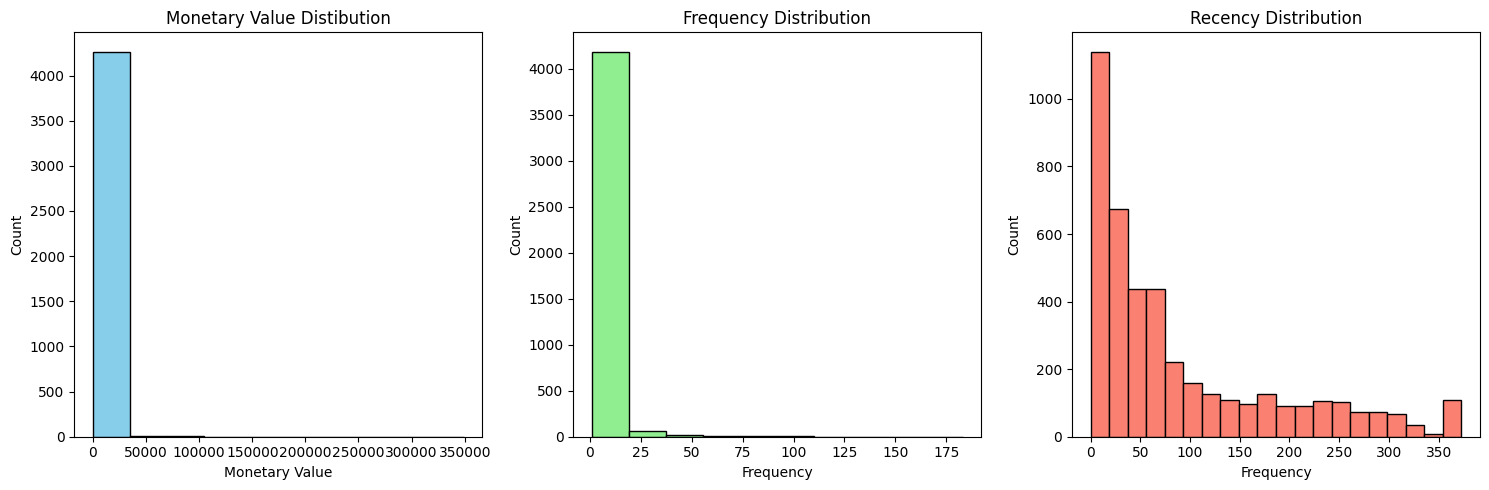

In [82]:
# Plotting to see if there are any outliers

plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df["MonetaryValue"], bins=10, color="skyblue", edgecolor="black")
plt.title("Monetary Value Distibution")
plt.xlabel("Monetary Value")
plt.ylabel("Count")

plt.subplot(1,3,2)
plt.hist(aggregated_df["Frequency"], bins=10, color="lightgreen", edgecolor="black")
plt.title("Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Count")

plt.subplot(1,3,3)
plt.hist(aggregated_df["Recency"], bins=20, color="salmon", edgecolor="black")
plt.title("Recency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

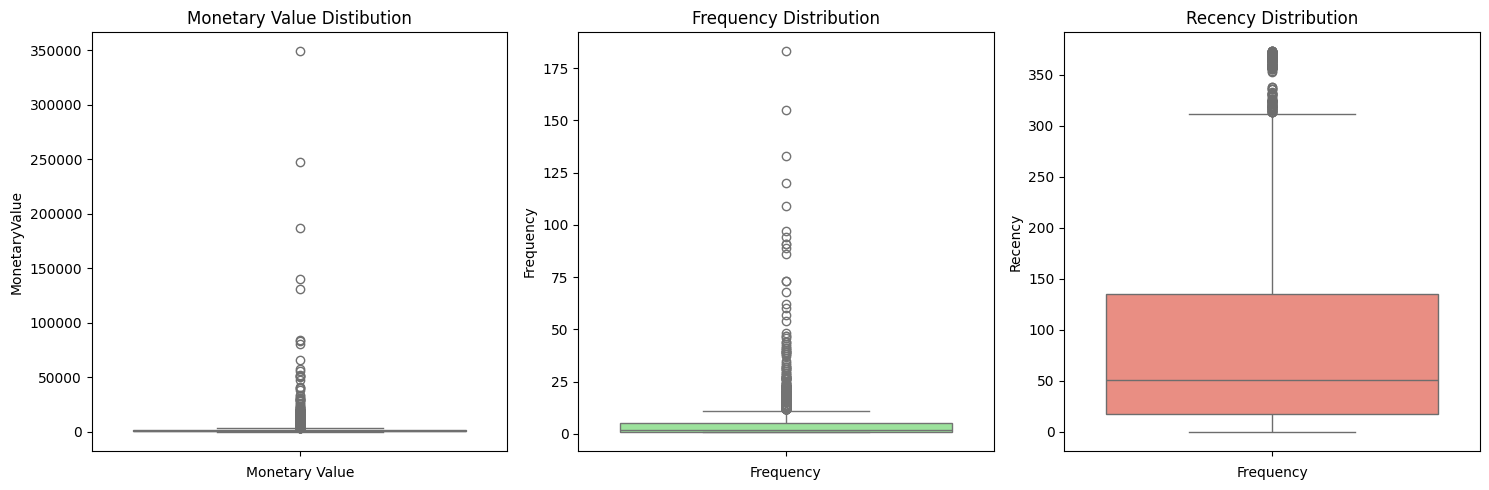

In [83]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.boxplot(data=aggregated_df["MonetaryValue"], color="skyblue")
plt.title("Monetary Value Distibution")
plt.xlabel("Monetary Value")

plt.subplot(1,3,2)
sns.boxplot(data=aggregated_df["Frequency"], color="lightgreen")
plt.title("Frequency Distribution")
plt.xlabel("Frequency")

plt.subplot(1,3,3)
sns.boxplot(data=aggregated_df["Recency"], color="salmon")
plt.title("Recency Distribution")
plt.xlabel("Frequency")

plt.tight_layout()
plt.show()

In [84]:
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)

M_IQR = M_Q3 - M_Q1

monetary_outliers_df = aggregated_df[(aggregated_df["MonetaryValue"] > (M_Q3 + 1.5* M_IQR)) | (aggregated_df["MonetaryValue"] < (M_Q1 - 1.5* M_IQR))].copy()

In [85]:
monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.00,423.00,423.00,423,423.00
mean,15103.04,12188.10,17.17,2010-11-09 12:26:02.978723328,30.04
min,12357.00,3802.04,1.00,2009-12-10 18:03:00,0.00
25%,13622.00,4605.94,8.00,2010-11-08 13:17:30,3.00
50%,14961.00,6191.32,12.00,2010-11-26 12:19:00,13.00
75%,16692.00,10273.24,18.00,2010-12-06 10:34:30,31.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,364.00
std,1728.66,25830.85,19.73,NaN,51.54


In [86]:
F_Q1 = aggregated_df["Frequency"].quantile(0.25)
F_Q3 = aggregated_df["Frequency"].quantile(0.75)

F_IQR = F_Q3 - F_Q1

frequency_outliers_df = aggregated_df[(aggregated_df["Frequency"] > (F_Q3 + 1.5* F_IQR)) | (aggregated_df["Frequency"] < (F_Q1 - 1.5* F_IQR))].copy()

In [87]:
frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.00,279.00,279.00,279,279.00
mean,15352.66,14409.71,23.81,2010-11-23 11:06:20.645161216,16.09
min,12437.00,1094.39,12.00,2010-05-12 16:51:00,0.00
25%,13800.00,4331.56,13.00,2010-11-20 13:14:30,2.00
50%,15465.00,6615.77,17.00,2010-12-02 10:46:00,7.00
75%,16828.50,11692.41,23.00,2010-12-07 11:08:30,19.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,211.00
std,1748.43,31381.74,21.93,NaN,26.59


In [88]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))]

non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3809.00,3809.00,3809.00,3809,3809.00
mean,15376.48,885.50,2.86,2010-09-03 11:16:46.516146176,97.08
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13912.00,279.91,1.00,2010-07-08 14:48:00,22.00
50%,15389.00,588.05,2.00,2010-10-12 16:25:00,58.00
75%,16854.00,1269.05,4.00,2010-11-17 13:14:00,154.00
max,18287.00,3788.21,11.00,2010-12-09 20:01:00,373.00
std,1693.20,817.67,2.24,NaN,98.11


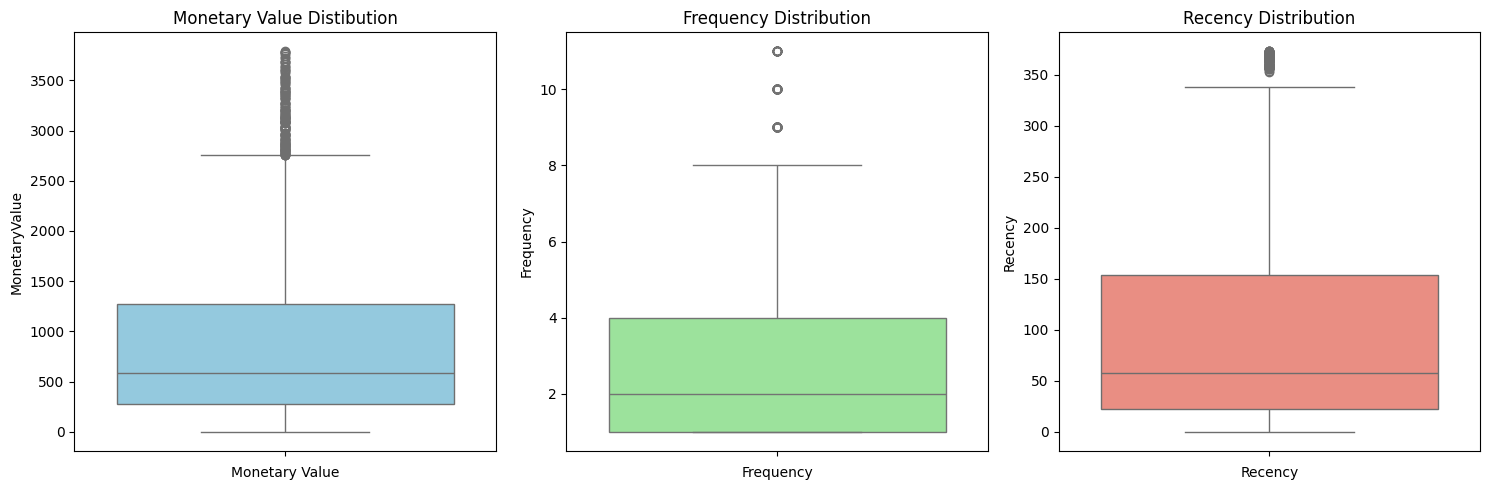

In [89]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df["MonetaryValue"], color="skyblue")
plt.title("Monetary Value Distibution")
plt.xlabel("Monetary Value")

plt.subplot(1,3,2)
sns.boxplot(data=non_outliers_df["Frequency"], color="lightgreen")
plt.title("Frequency Distribution")
plt.xlabel("Frequency")

plt.subplot(1,3,3)
sns.boxplot(data=non_outliers_df["Recency"], color="salmon")
plt.title("Recency Distribution")
plt.xlabel("Recency")

plt.tight_layout()
plt.show()

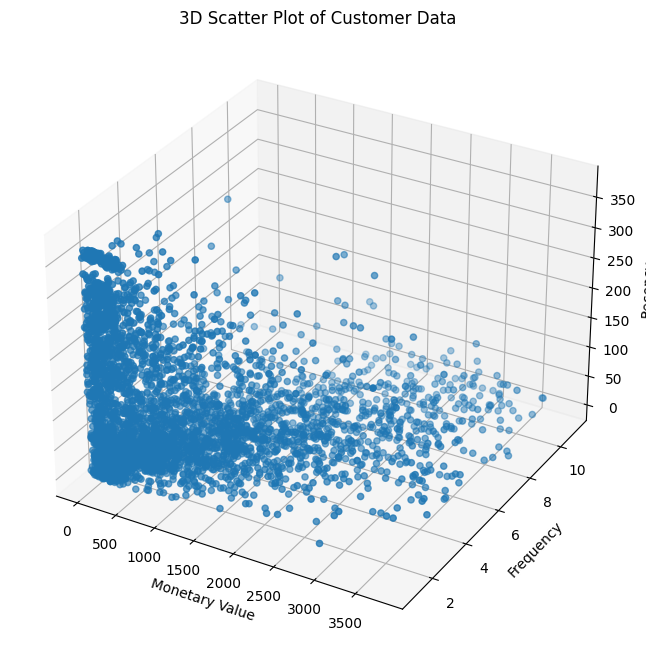

In [90]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Recency"])

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter Plot of Customer Data")

plt.show()

In [91]:
# Standardizing

scalar = StandardScaler()

scaled_data = scalar.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])

scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

In [92]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=("MonetaryValue", "Frequency", "Recency"))

scaled_data_df

,MonetaryValue,Frequency,Recency
0,-0.88,-0.38,0.68
1,0.54,-0.38,-0.97
2,-0.81,-0.83,-0.25
3,1.63,-0.38,-0.56
4,-0.72,-0.83,-0.89
...,...,...,...
4280,-0.30,1.40,-0.82
4281,-0.58,-0.83,-0.32
4282,-0.62,-0.83,2.02
4283,0.44,-0.38,0.14


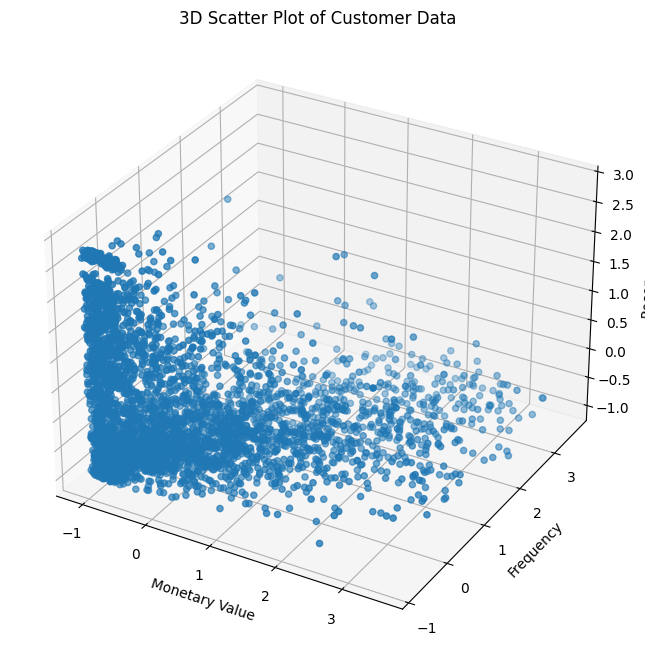

In [93]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

## KMeans Clustering

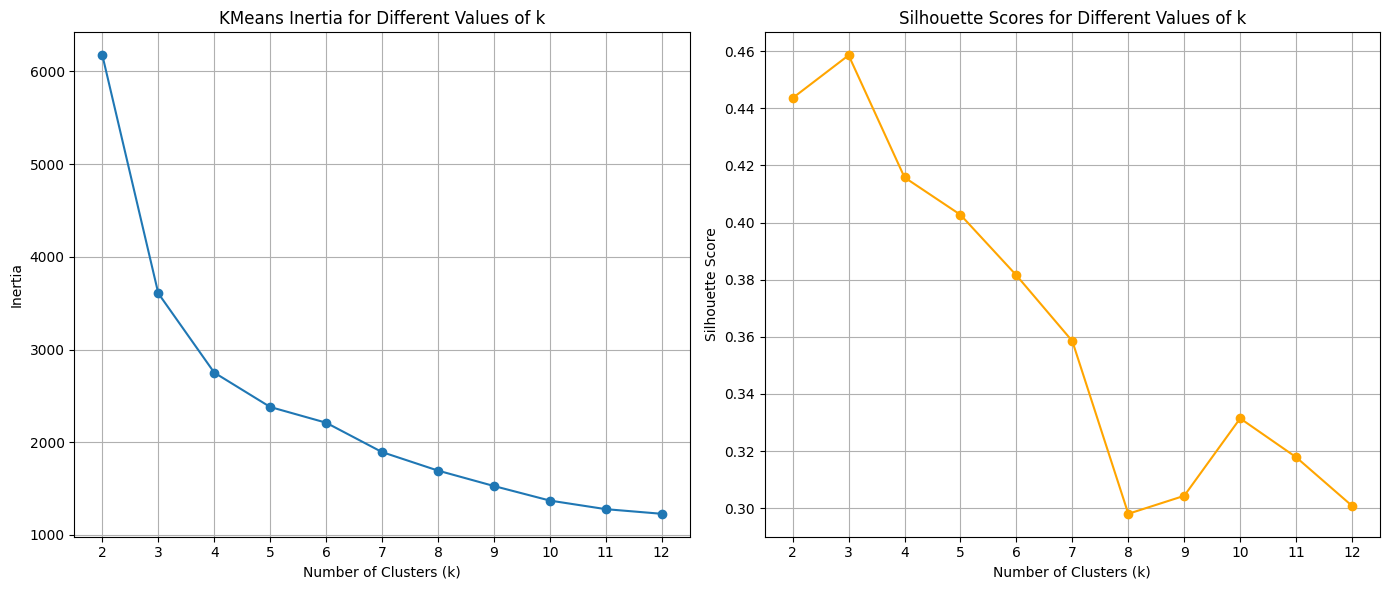

In [94]:
max_k = 12

inertia = []
silhouette_scores = []
k_values = range(2, max_k+1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhouette_scores.append(sil_score)
    
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title("KMeans Inertia for Different Values of k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Scores for Different Values of k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

In [95]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([1, 0, 2, ..., 1, 0, 0])

In [96]:
non_outliers_df["Cluster"] = cluster_labels

non_outliers_df

C:\Users\ScottieDFloppyPC\AppData\Local\Temp\ipykernel_18744\3577770544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["Cluster"] = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00,17,0
4281,18284.00,411.68,1,2010-10-04 11:33:00,66,2
4282,18285.00,377.00,1,2010-02-17 10:24:00,295,1
4283,18286.00,1246.43,2,2010-08-20 11:57:00,111,0


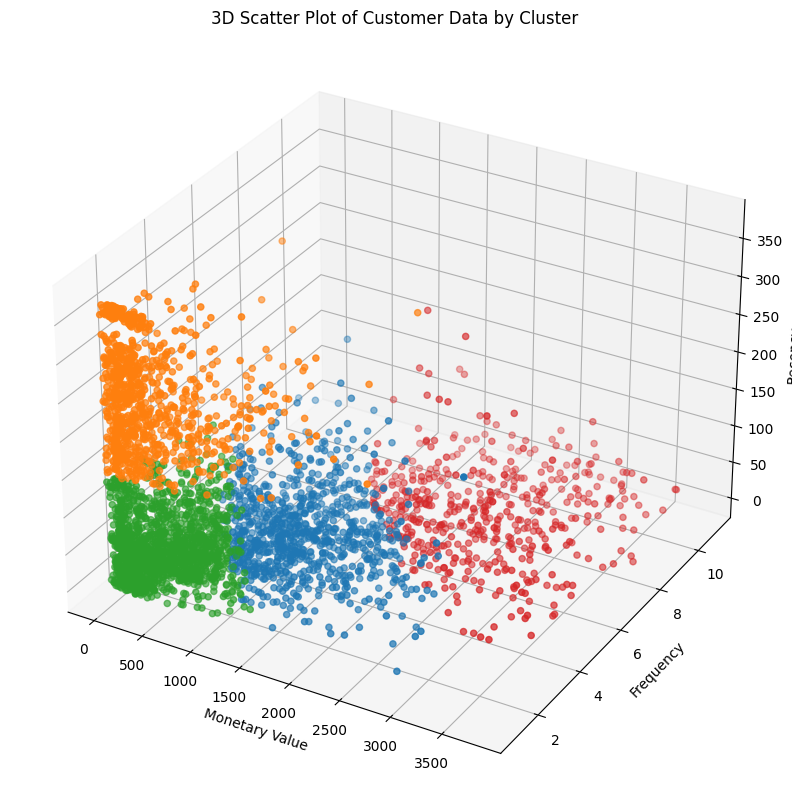

In [97]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'], 
                     non_outliers_df['Frequency'], 
                     non_outliers_df['Recency'], 
                     c=colors,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

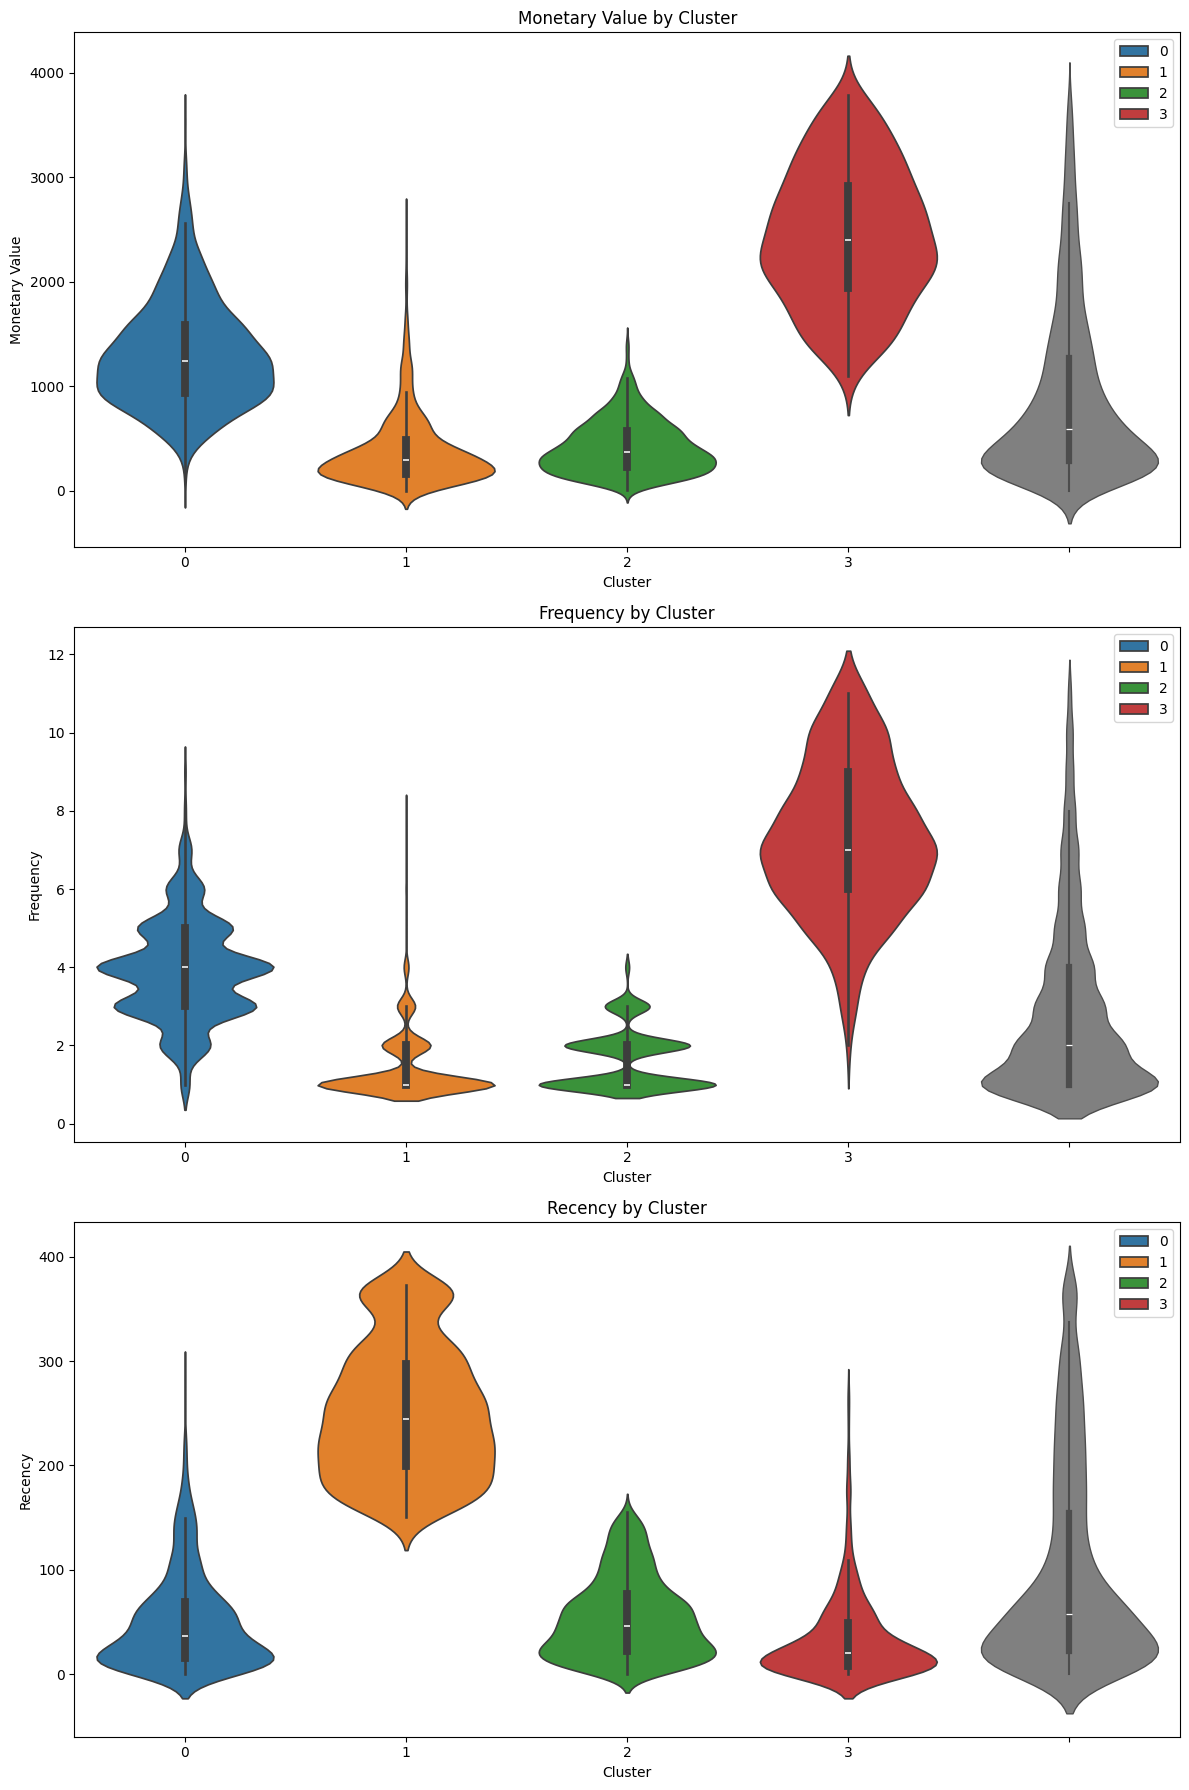

In [99]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

## Cluster Analysis

1. Cluster 0 (Blue): "Retain"

Rationale: This cluster represents high value customers who purchase products regularly, however, not always recently. The focus should be on retention efforts to maintain loyalty and spending habits

Action: Implement loyalty programs, personalized offers and regular engagement to ensure active spending

2. Cluster 1 (Orange): "Re-engage"

Rationale: This group represents lower-value and infrequent buyers who haven't purchased products recently. The focus should be on re-engagement to bring them into active purchasing behaviour


Action: Use targeted-marketing compaigns, special discounts, or reminders to encourage them to return and purchase products

3. Cluster 2 (Green): "Nurture"

Rationale: This group represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase engagement and spending


Action: Focus on building relationships, providing excellent customer service, and offering incentives to encourage frequent purchases

4. Cluster 3 (Red): "Reward"

Rationale: This cluster includes high-value and frequent customers, many of whom are still purchasing. They are the most loyal customers, and rewarding their loyalty is key to maintaining engagement

Action: Implement a robust loyalty program, provide exclusive offers and recognize their loyalty to keep them engaged and satisfied

## Outlier Analysis

In [101]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

overlap_indices

Index([  65,   84,   85,   92,  126,  145,  164,  179,  202,  203,
       ...
       4107, 4125, 4143, 4156, 4200, 4235, 4236, 4237, 4241, 4262],
      dtype='int64', length=226)

In [102]:
monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)

monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])
outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.00,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.00,4782.84,4,2010-08-31 14:54:00,100,-1
42,12409.00,12346.62,4,2010-10-15 10:24:00,55,-1
48,12415.00,19468.84,4,2010-11-29 15:07:00,10,-1
61,12431.00,4145.52,11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3


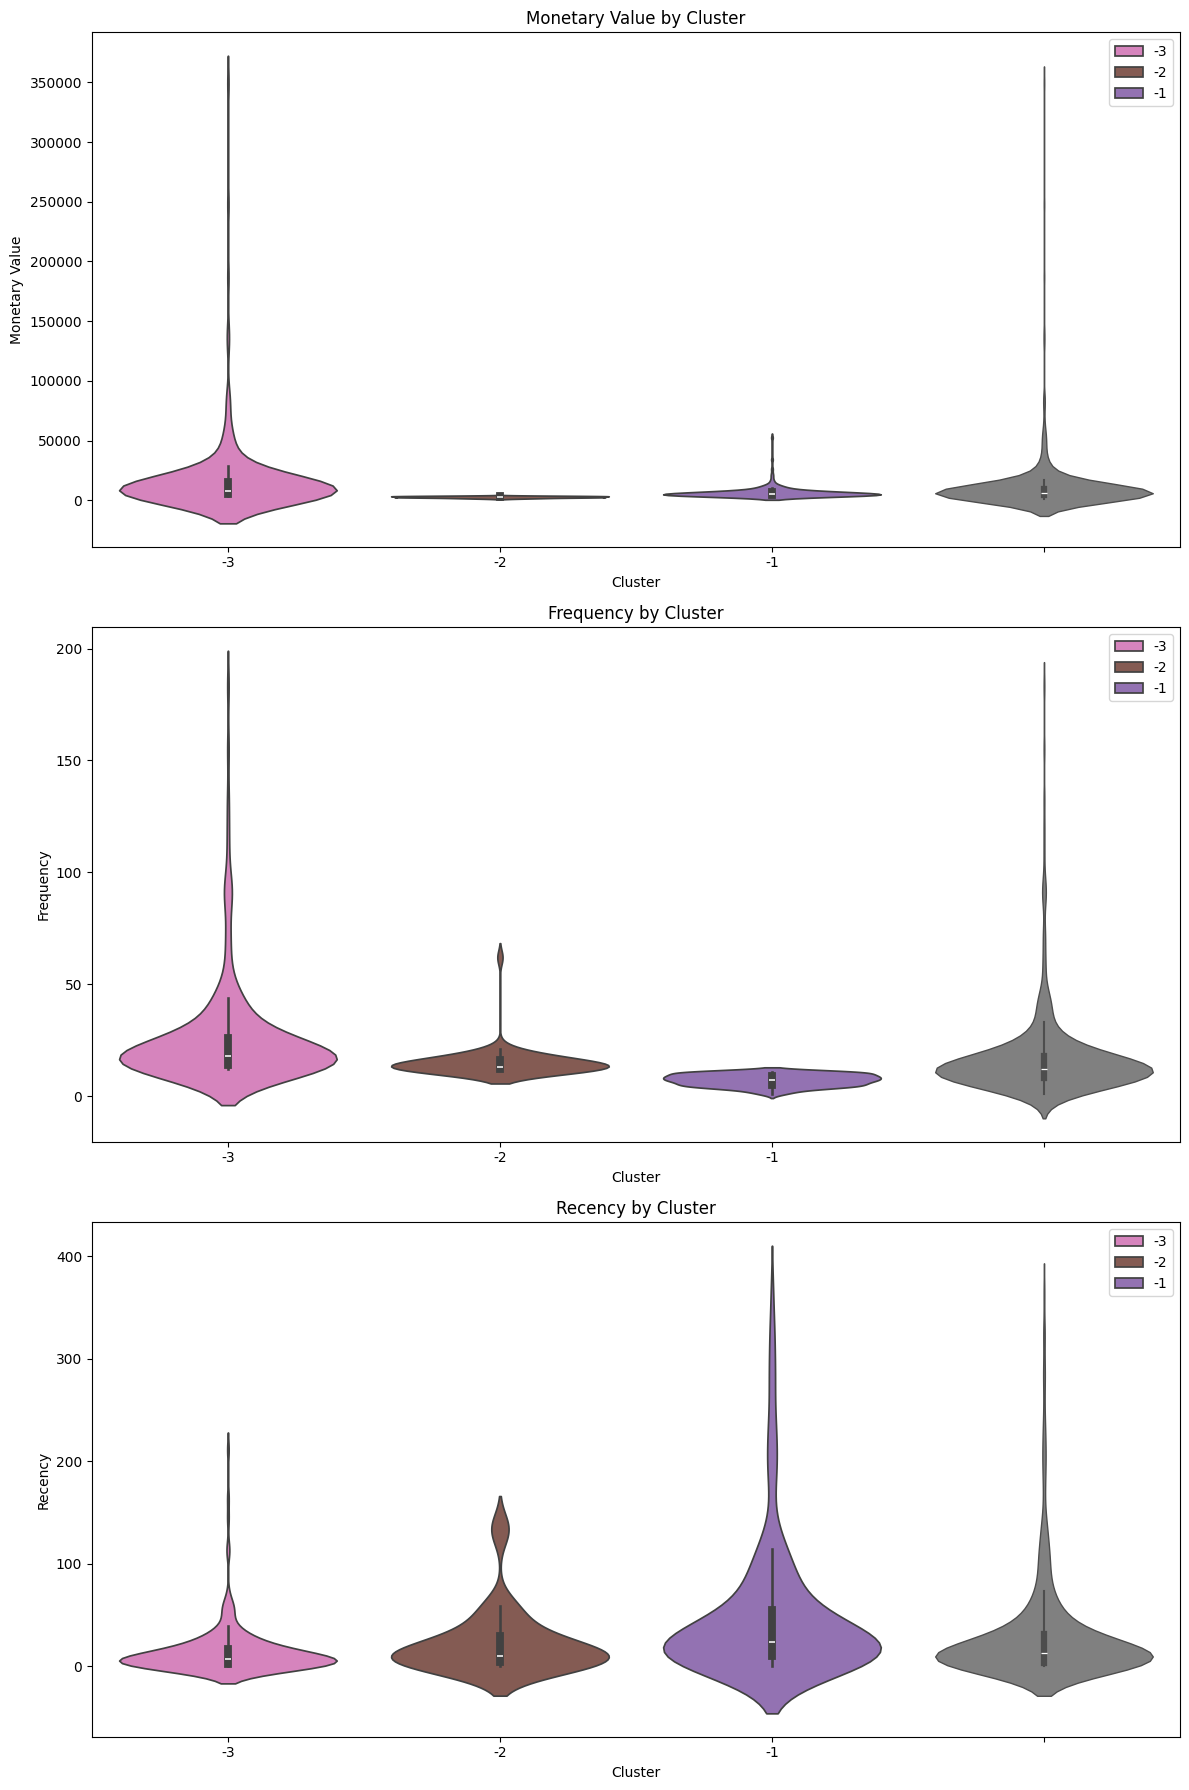

In [103]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

### Outlier Cluster Analysis

1. Cluster -1 (Monetary Outliers): "Pamper"

Rationale: This cluster represents high spenders but not frequent buyers, their purchases are large but infrequent. 


Action: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity

2. Cluster -2 (Frequency Outliers): "Upsell"

Rationale: This cluster represents frequent buyers who spend less per purchase, these customers are engaged but may benefit from upselling opportunities


Action: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement

3. Cluster -3 (Monetary & Frequency Outliers): "Delight"

Rationale: This cluster represents customers who spend heavily and make frequent purchases. They are likely top-tier customers who require special attention.


Action: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement

In [105]:
cluster_labels = {
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}


In [106]:
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3


In [107]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1,RE-ENGAGE
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0,RETAIN
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2,NURTURE
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0,RETAIN
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2,NURTURE
...,...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3,DELIGHT
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3,DELIGHT
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3,DELIGHT
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3,DELIGHT


## Visualization

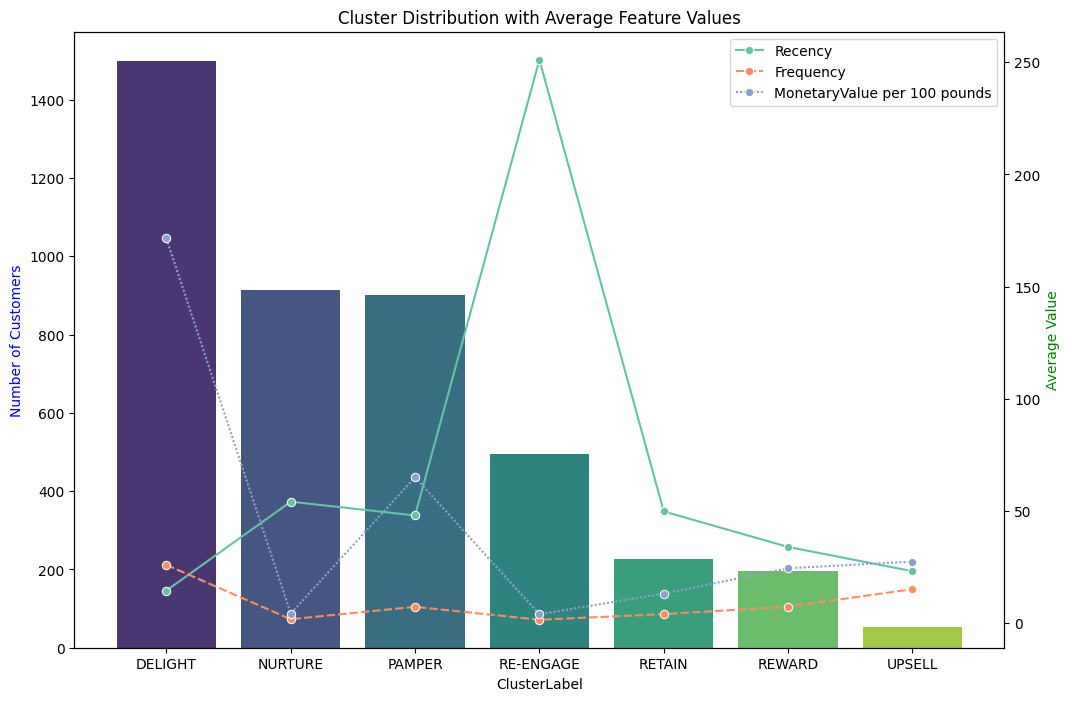

In [108]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()